Gradient Boosting Regression for Youmgs Modulus Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Loading the data
data = pd.read_csv("Final_Youngs_Data.csv")
data = data.iloc[:,1:data.shape[1]]
colnames = data.columns[1:data.shape[1] - 1]
print(colnames)

Index(['Diff. Lattice Constants', 'Diff. Melting Point', 'Mixing Enthalpy',
       'Lattice Constants', 'Lambda', 'Diff. in atomic radii', 'Omega',
       'Melting Temp.', 'Diff. Electronegativity', 'Mixing Entropy',
       'Valence electron'],
      dtype='object')


In [8]:
# Separating data
X = data.iloc[:,1:12]
Y = data.iloc[:,-1]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

# Standardizing the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_train.columns = colnames
scaled_X_train.head()

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron
0,-0.153751,1.745879,-2.229173,0.112065,-0.259062,-0.317392,-0.430099,-0.116007,-0.906235,0.264518,-1.212358
1,0.039249,-0.289765,-1.564191,-0.171248,-0.265426,0.497143,-0.428104,-1.065766,-0.644810,0.419453,0.833764
2,-0.637270,-1.236588,-0.055600,-0.163308,-0.263311,-1.211909,-0.421334,2.783730,2.125245,-2.943782,-0.445074
3,0.070277,-0.138085,-1.030326,-0.219464,-0.264735,0.550555,-0.404028,-1.144813,-0.648109,0.992985,0.762235
4,0.011280,-0.100780,-0.526113,0.043806,-0.264540,0.515547,-0.378708,-1.224522,-0.634651,0.992985,0.869549


In [9]:
scaled_X_test = pd.DataFrame(scaler.transform(X_test))
scaled_X_test.columns = colnames
scaled_X_test.head()

,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron
0,-0.229353,0.329434,-1.161797,-0.432303,-0.267393,0.880033,-0.405744,-0.247981,-1.303632,0.170392,-0.976271
1,-0.532852,-0.162926,0.758004,-0.384137,-0.267954,1.142901,0.388629,0.395844,0.757393,0.359315,-0.932005
2,-0.155860,-0.446599,0.153479,0.160588,-0.261704,-0.072957,-0.311853,-1.077913,-0.520336,0.294780,1.298803
3,-0.255598,0.978513,-0.908198,-0.219552,-0.258546,-0.303781,-0.377989,0.181111,0.405032,0.475871,-0.871371
4,-0.404198,0.132957,-0.573258,-0.082663,-0.268626,0.352424,-0.412718,0.709038,-0.694336,-1.669782,-0.181076


In [23]:
# Defining the parameters
params = {
    'n_estimators': 500,
    'learning_rate': 0.1
}
# Training the gradient boosting regression model
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(**params, random_state = 1)
gbr.fit(scaled_X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
# crossvalidating
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

cv_error = cross_val_score(gbr,scaled_X_train,Y_train,cv = 5, scoring = 'neg_mean_absolute_error')
print("The cross validated test score for the training data set is :",round(np.mean(cv_error),4))

The cross validated test score for the training data set is : -34.784


In [12]:
# predicting for test set
pred = gbr.predict(scaled_X_test)
error = mean_absolute_error(Y_test,pred)
print("The Mean Absolute Error for the Test set is :", error)

The Mean Absolute Error for the Test set is : 23.53875883324723


In [13]:
# Grid Search For Hypermparameter Optimization

from sklearn.model_selection import GridSearchCV

# Defining the grid values
grid_value = {
    'n_estimators' : [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

# Redefining the regressor
reg = GradientBoostingRegressor(random_state= 1)

# Gridsearch
clf = GridSearchCV(reg, grid_value, cv = 5, scoring = 'neg_mean_absolute_error')
clf.fit(scaled_X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [14]:
print('Best parameter:',clf.best_params_)
print('Best Score:',clf.best_score_)

Best parameter: {'learning_rate': 0.1, 'n_estimators': 500}
Best Score: -34.78401851562143


In [16]:
# Creating the optimized parameter
opt_gbr = GradientBoostingRegressor(**clf.best_params_,random_state = 1)
opt_gbr.fit(scaled_X_train,Y_train)

# Predicting the results for the test set
test_pred = opt_gbr.predict(scaled_X_test)

#error
test_error = mean_absolute_error(Y_test,test_pred)
print("The test error is:",test_error)

The test error is: 23.53875883324723


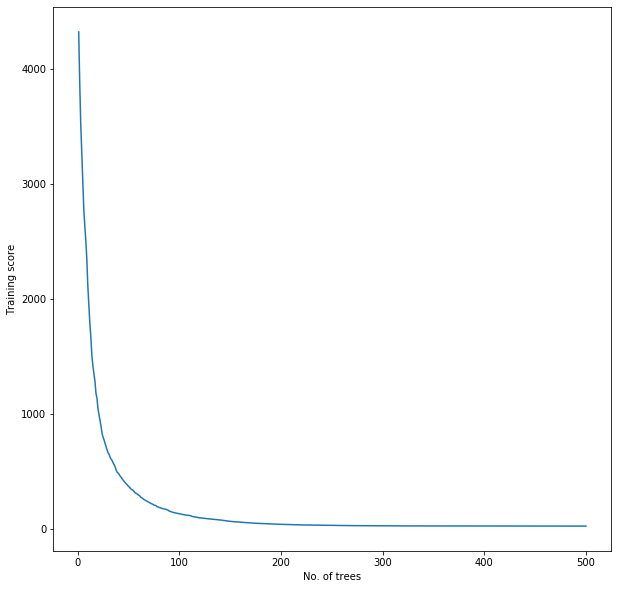

In [17]:
plt.figure(figsize= (10,10))
sns.lineplot(range(1,len(opt_gbr.train_score_)+1),opt_gbr.train_score_)
plt.xlabel("No. of trees")
plt.ylabel("Training score")
plt.show()

In [1]:
importance = list(opt_gbr.feature_importances_)
imp = pd.DataFrame({'features': colnames,'importance':importance})
imp = imp.sort_values(by = 'importance',axis = 0, ascending = False)
plt.figure(figsize = (10,10))
sns.barplot(imp.loc[:,'importance'],imp.loc[:,'features'])
plt.title("Feature Importance For Youngs Modulus Prediction For Gradient Boosting")
plt.save("feature_gbr.png")

NameError: name 'opt_gbr' is not defined

99